<a href="https://colab.research.google.com/github/kimvongola/ML_HW1/blob/main/Copy_of_Copy_of_SUPPORT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://archive.ics.uci.edu/dataset/880/support2

In [ ]:
!pip install ucimlrepo
!pip install --upgrade scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import mstats
from scipy.stats import f_oneway

import math

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

# metadata
print(support2.metadata)

# variable information
print(support2.variables)
df=pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [ ]:
# df['crea']
def printDist(df):
    columns_per_row = 3

    # Total number of continuous variables
    num_columns = len(df.columns.tolist())

    # Calculate the number of rows needed
    num_rows = math.ceil(num_columns / columns_per_row)

    # Create the figure with an appropriate size
    plt.figure(figsize=(columns_per_row * 5, num_rows * 3))

    # Loop through each column and create subplots
    for i, column in enumerate(df.columns.tolist()):
        plt.subplot(num_rows, columns_per_row, i + 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'{column}')
        plt.xlabel(column)
        plt.ylabel('Density')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

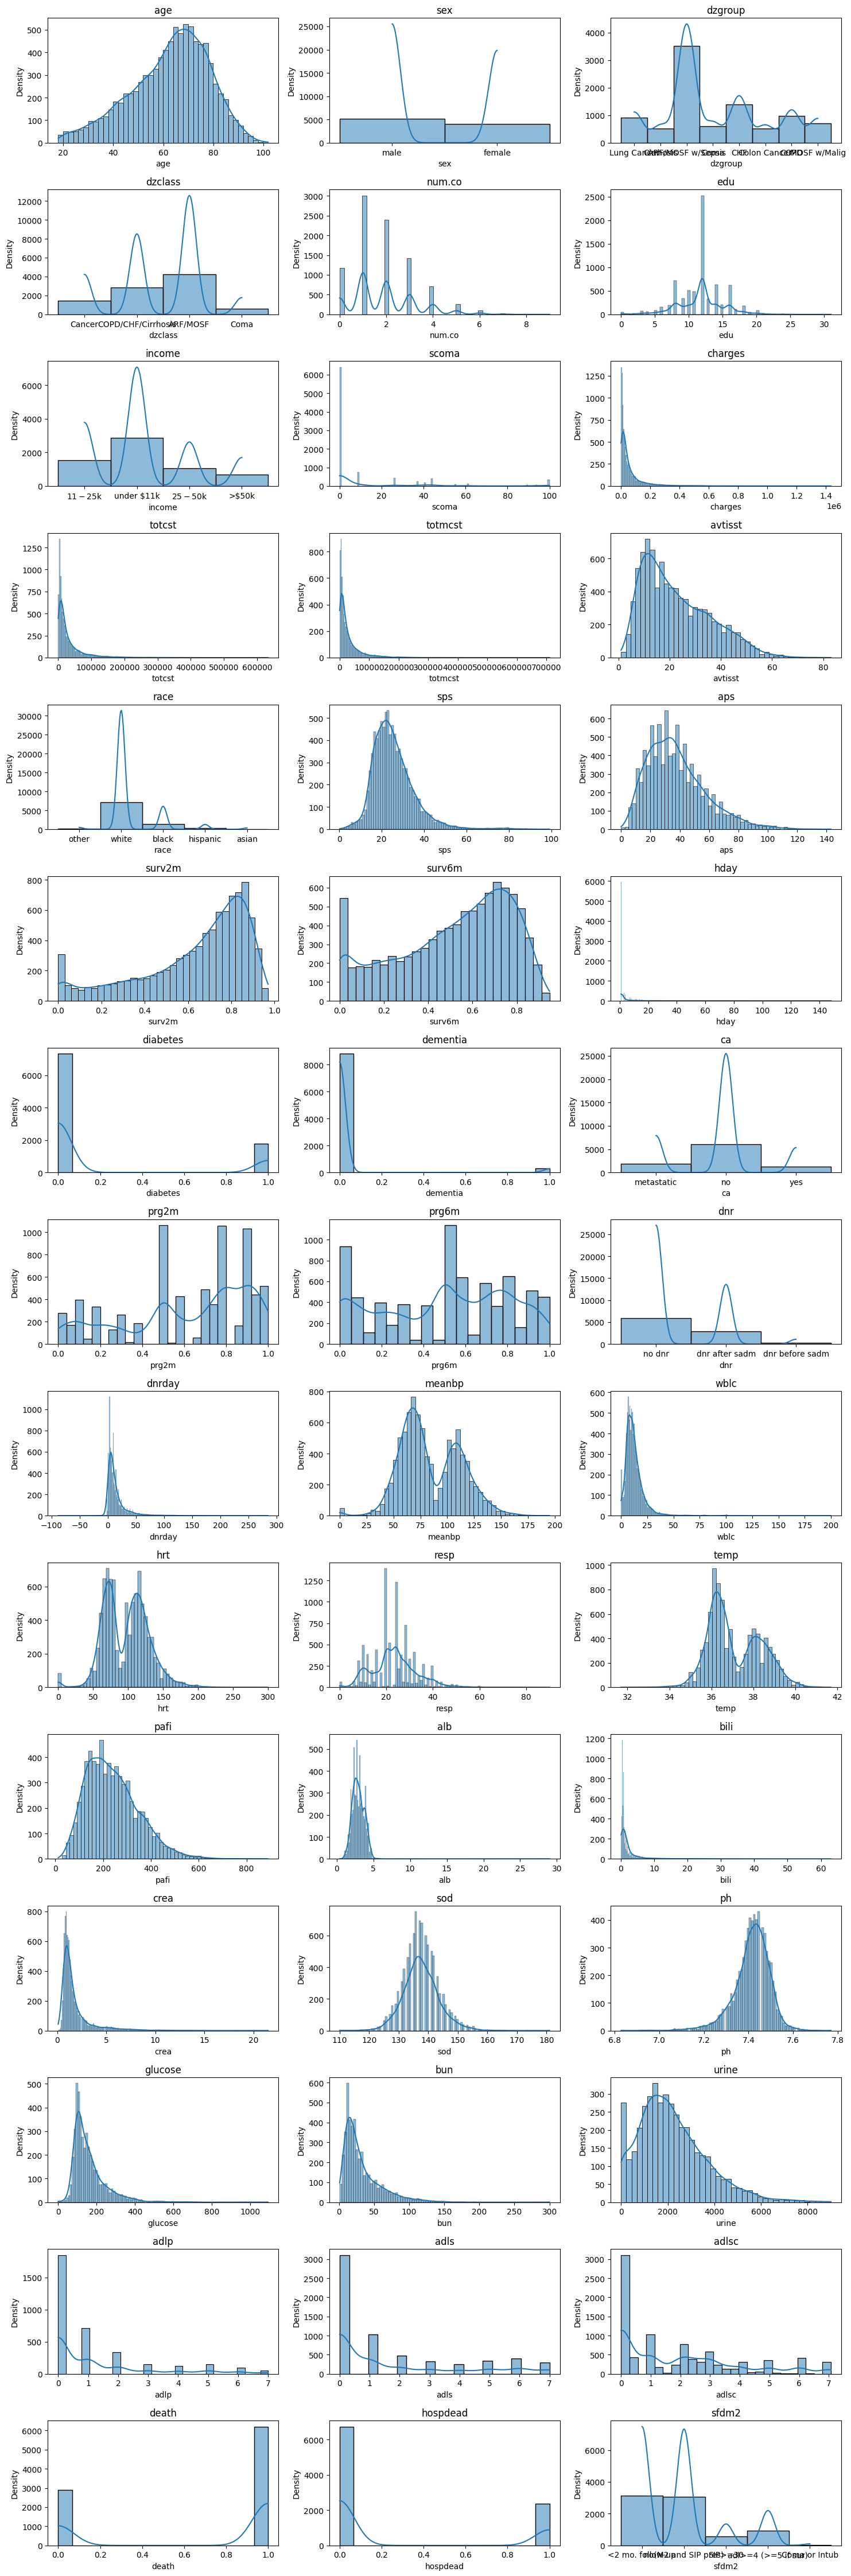

In [ ]:
printDist(df)
# print(df.isnull().sum())
# df.describe()

##Data Cleaning

In [ ]:
def missvaluefix(df):

  for label in df.columns[1:]:
    if df[label].isnull().sum() >= 0.3*len(df[label]):
      df.drop(label,axis = 1,inplace = True)
    else:
      if df[label].dtype == 'object':
        df[label].fillna(df[label].mode()[0], inplace=True)
      else:
        df[label].fillna(df[label].mean(), inplace=True)
  return df
  # for col in df.columns[1:]:
  #   if df[col].dtype == 'object':
  #     df[col].fillna(df[col].mode()[0], inplace=True)
  #   else:
  #     df[col].fillna(df[col].mean(), inplace=True)
  # return df


In [ ]:
# coldrop()
new_df=missvaluefix(df)
print(new_df.isnull().sum())



age         0
sex         0
dzgroup     0
dzclass     0
num.co      0
edu         0
scoma       0
charges     0
totcst      0
avtisst     0
race        0
sps         0
aps         0
surv2m      0
surv6m      0
hday        0
diabetes    0
dementia    0
ca          0
prg2m       0
prg6m       0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
bili        0
crea        0
sod         0
ph          0
adlsc       0
death       0
hospdead    0
sfdm2       0
dtype: int64


##Exploratory Data Analysis

Categorical Data

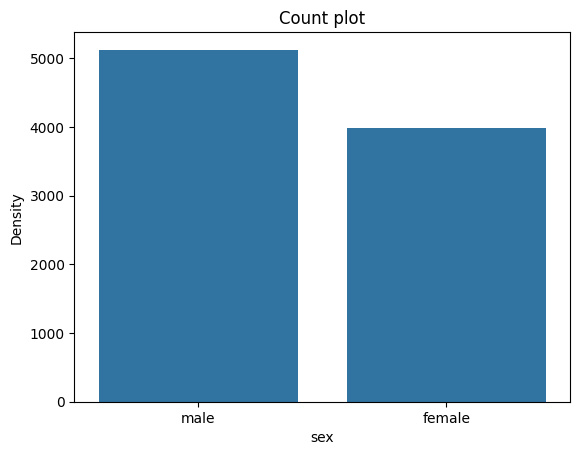

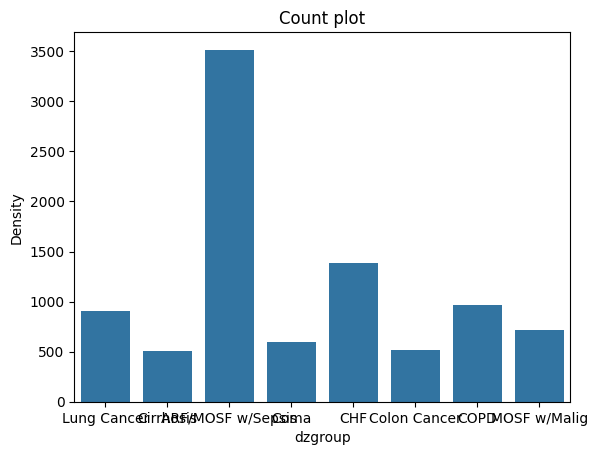

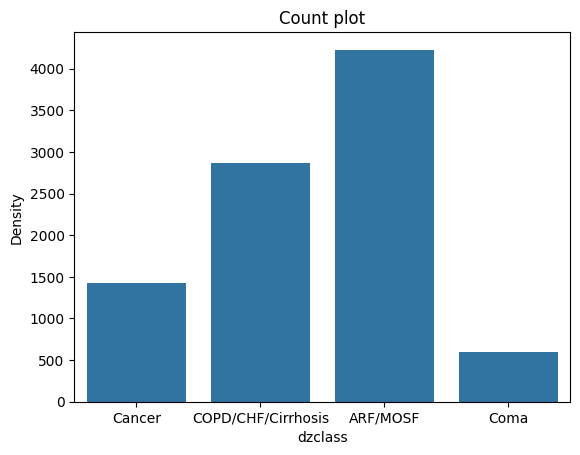

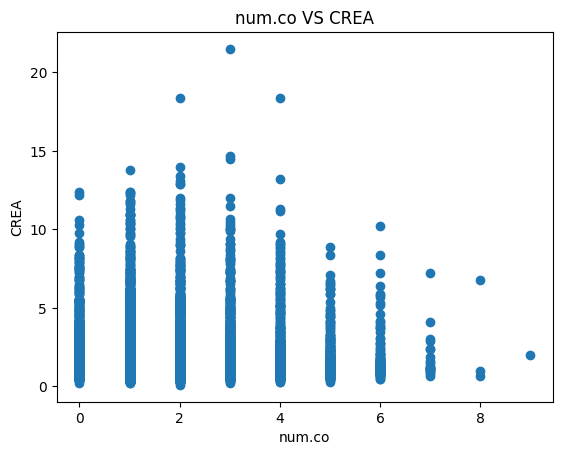

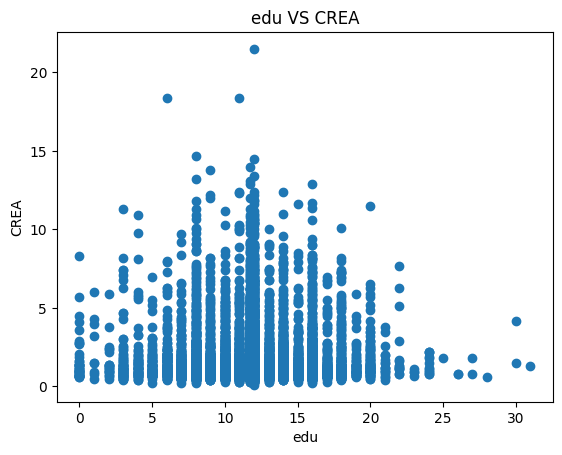

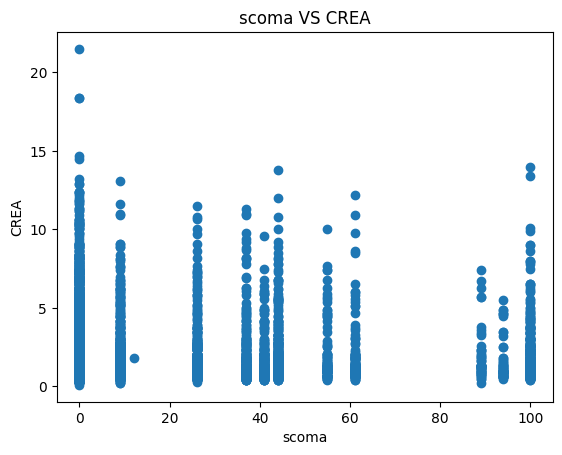

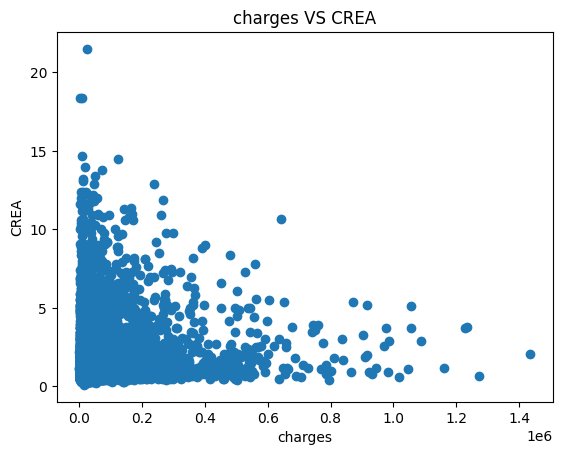

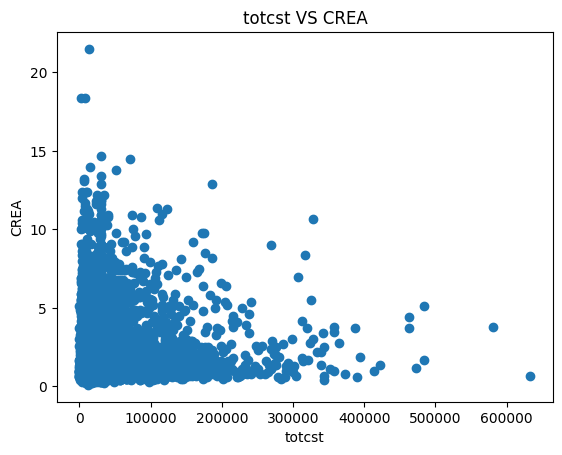

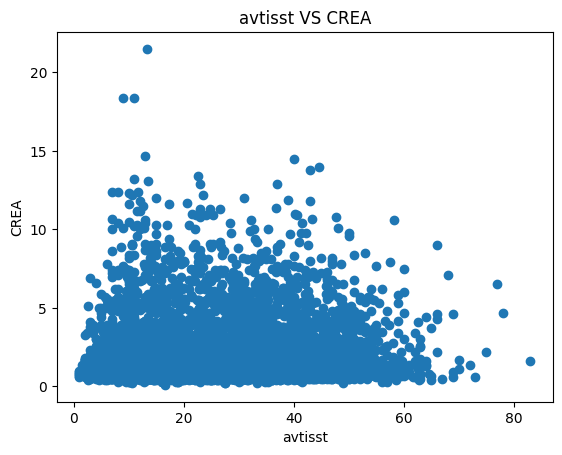

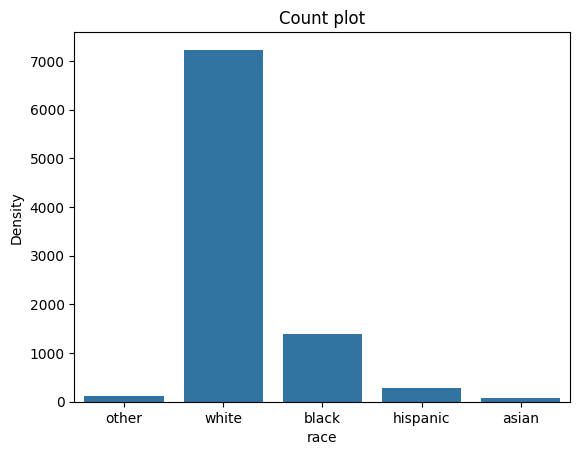

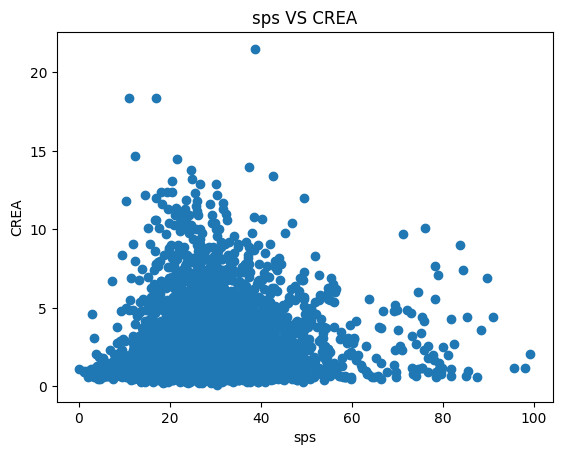

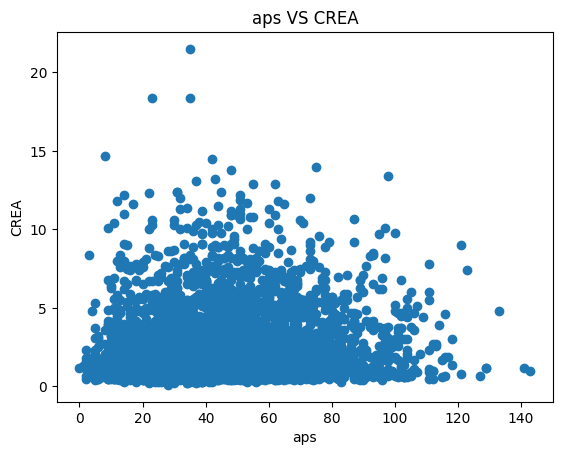

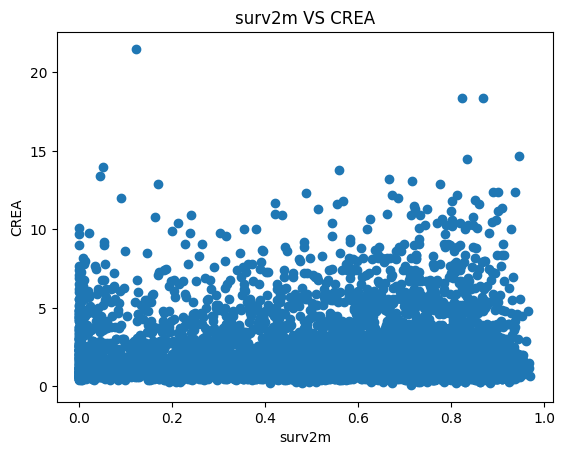

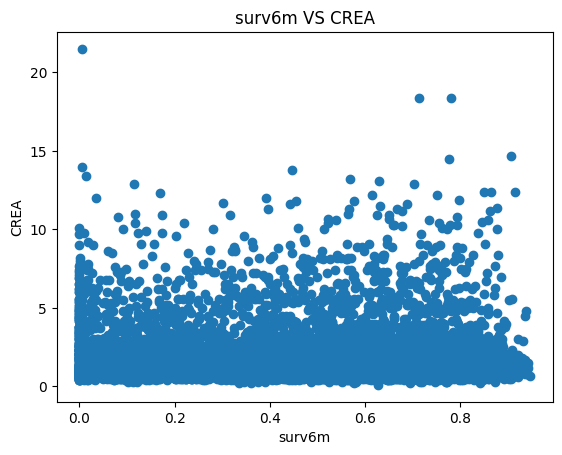

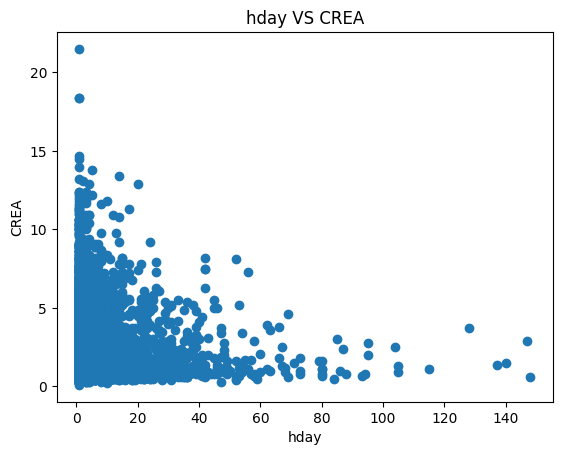

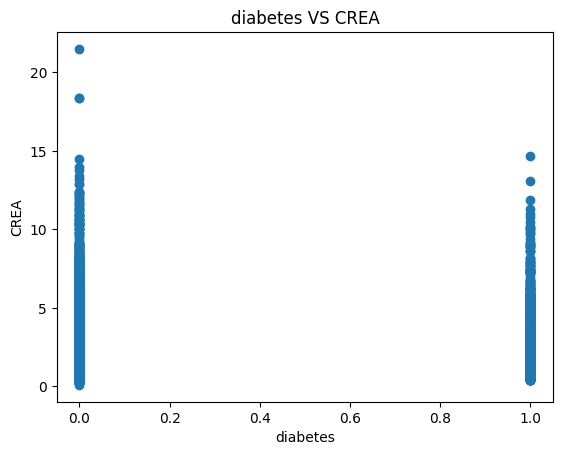

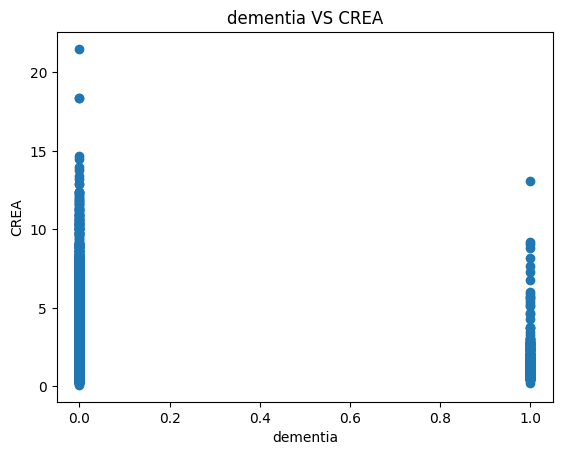

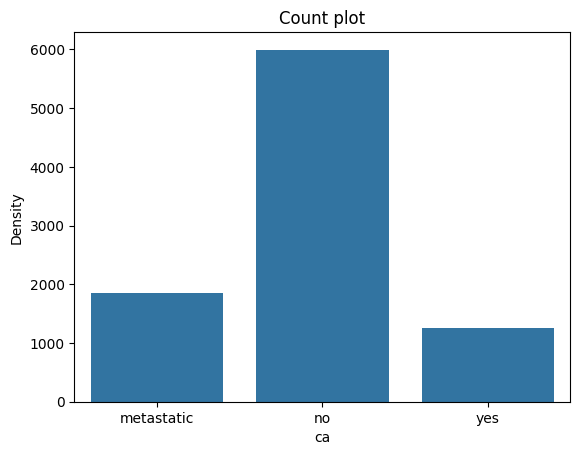

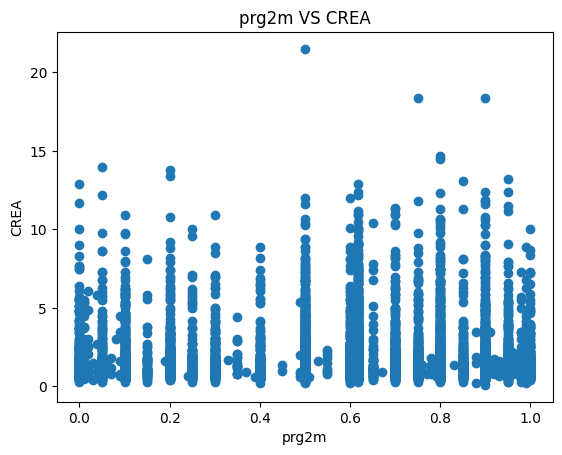

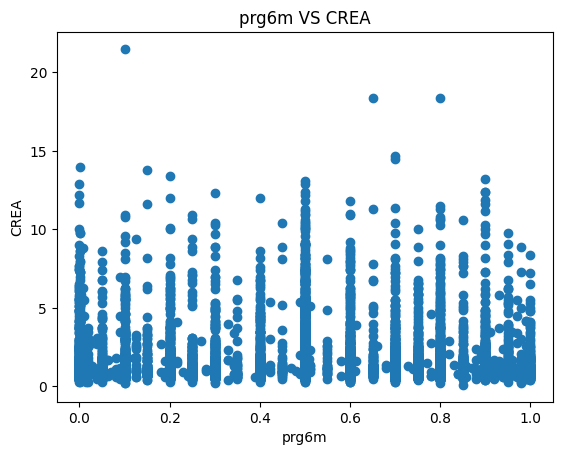

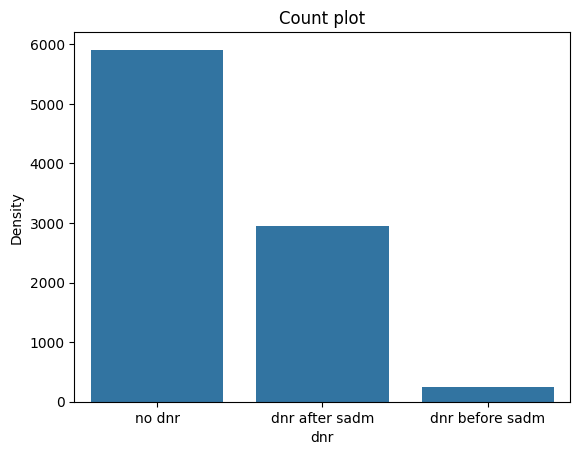

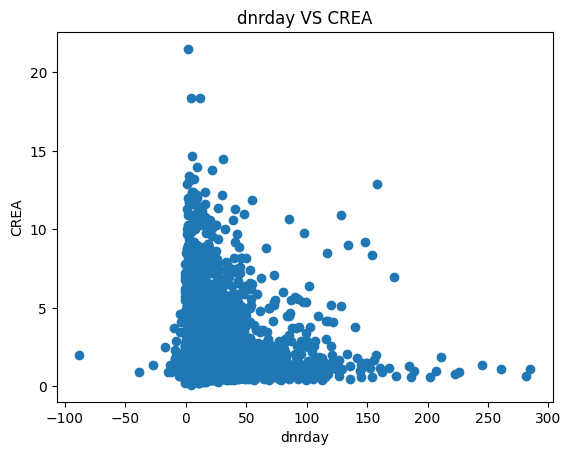

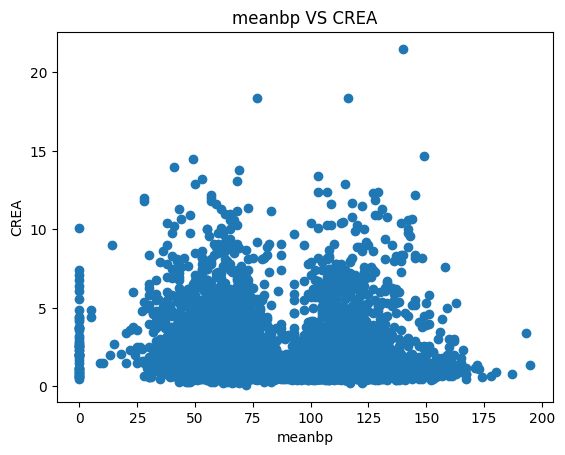

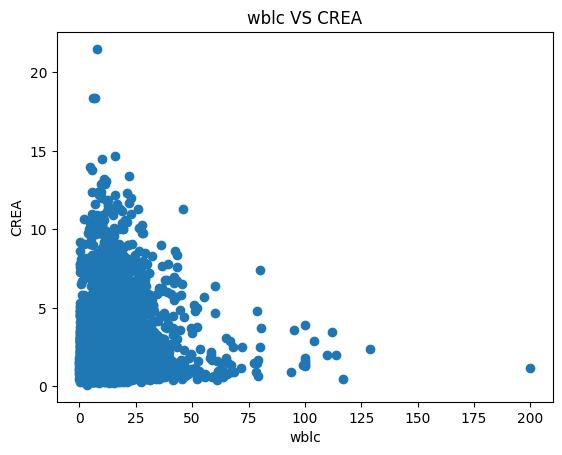

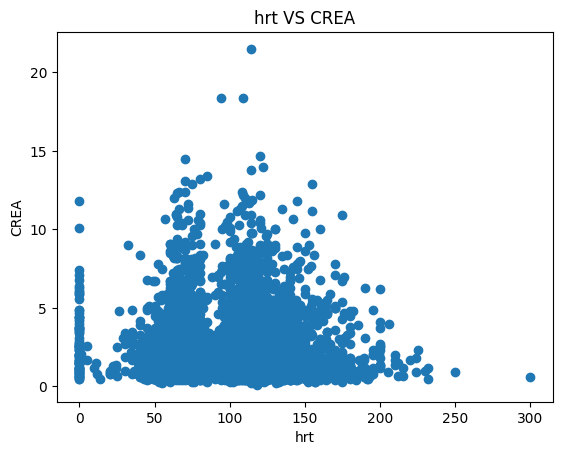

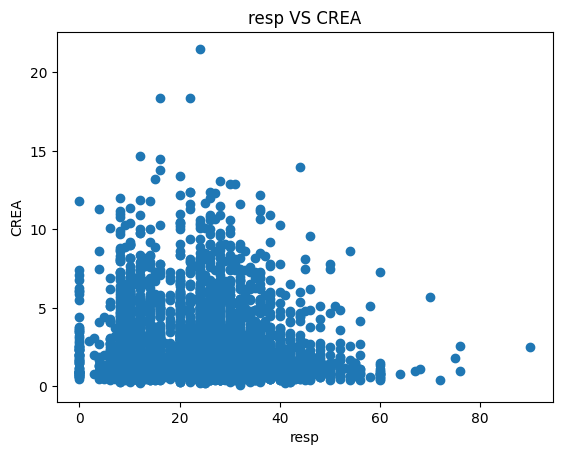

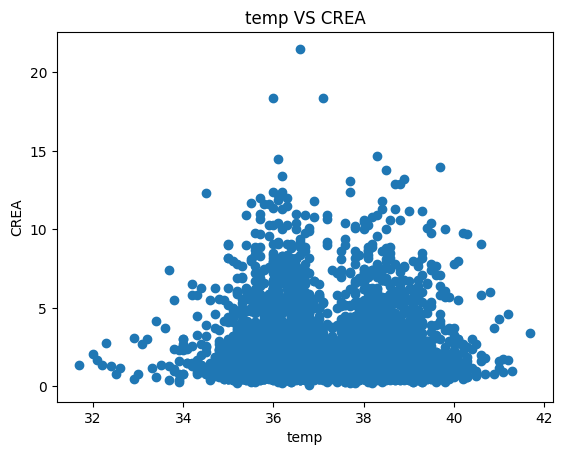

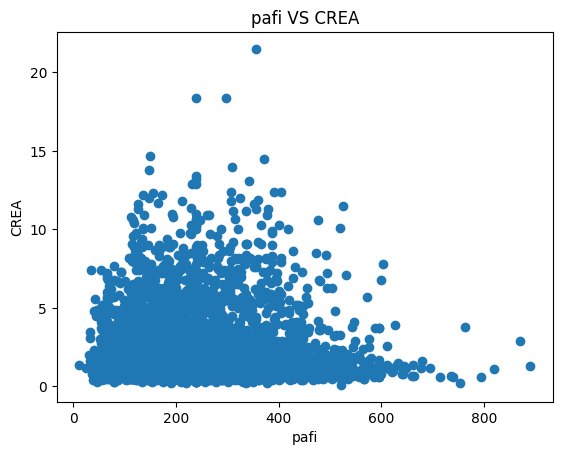

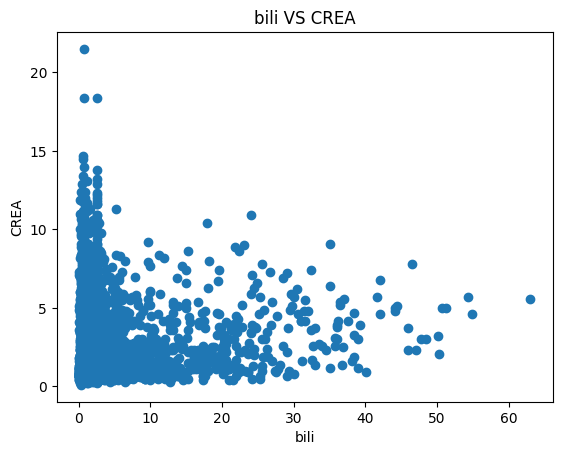

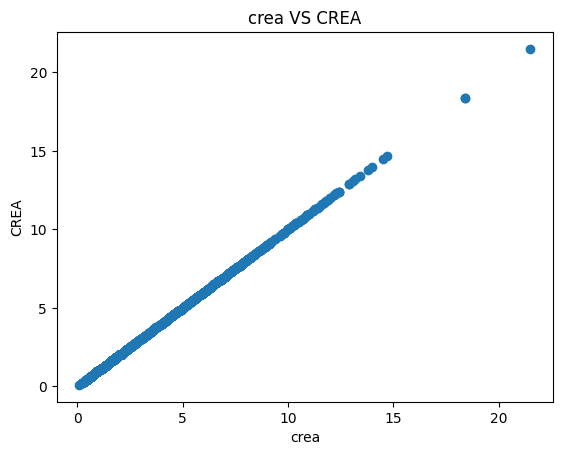

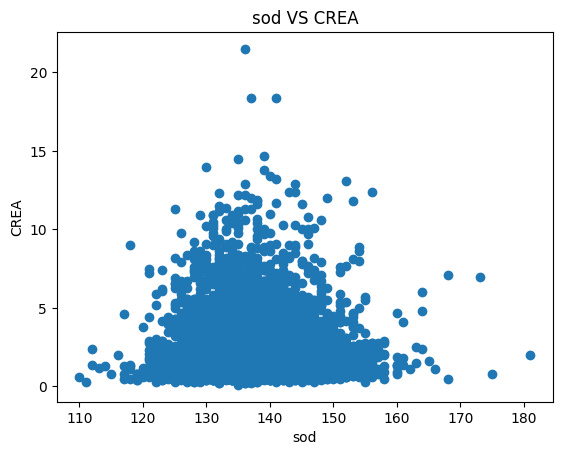

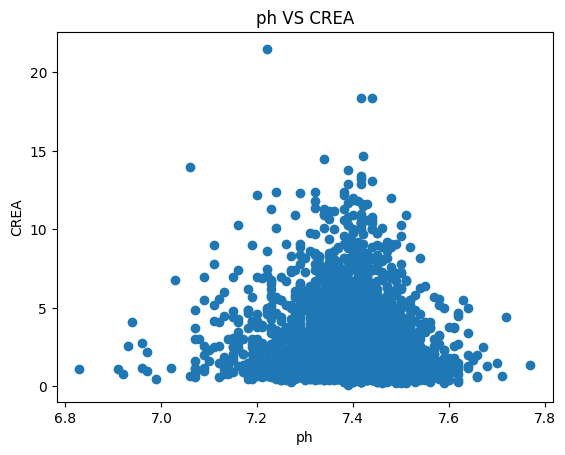

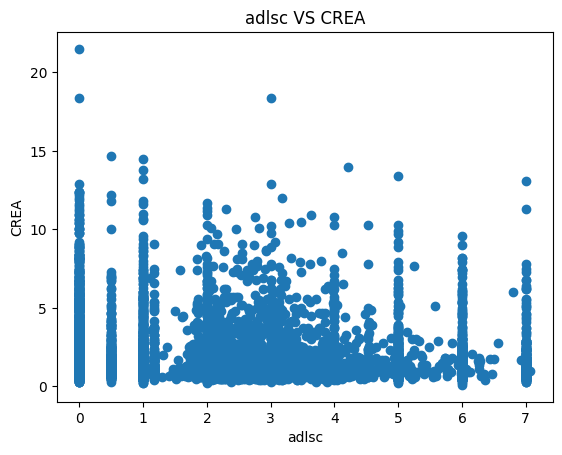

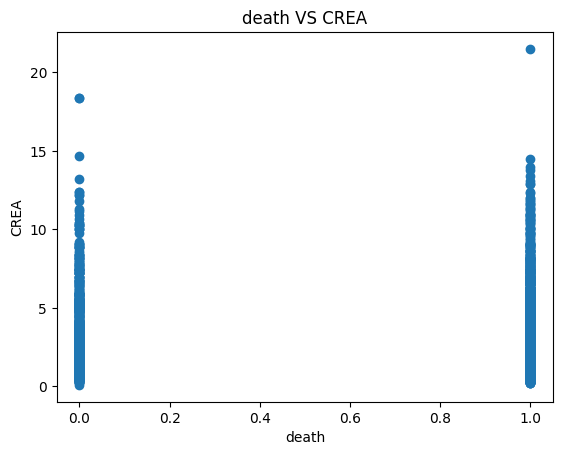

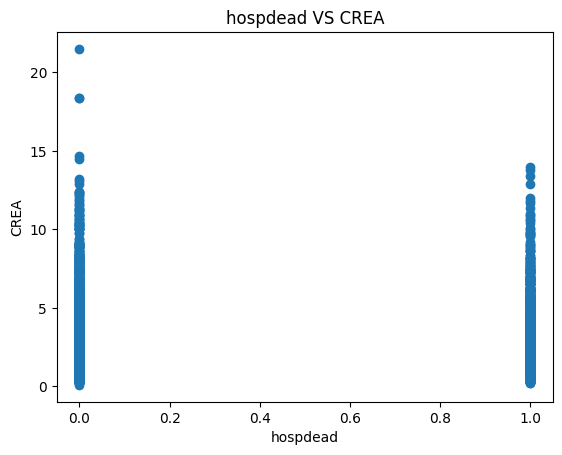

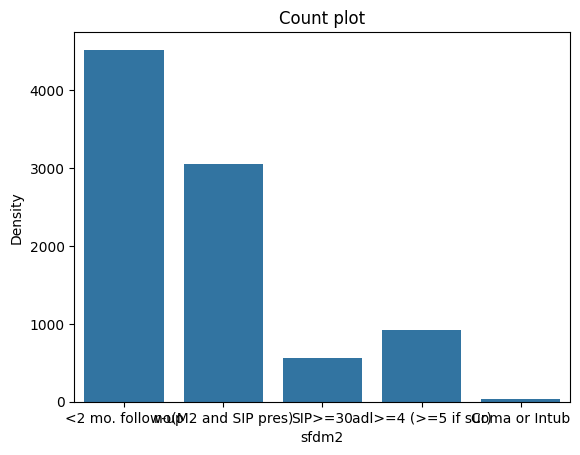

In [ ]:
# def plot():
for label in df.columns[1:]:
  if df[label].dtype == 'object':
    sns.countplot(x=label, data=df)
    plt.title('Count plot')
    plt.xlabel(label)
    plt.ylabel('Density')
    # Q1 = df[label].value_counts().quantile(0.25)
    # Q3 = df[label].value_counts().quantile(0.75)
    # IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR
    # inside_box = df[(df[label].value_counts() >= Q1) & (df[label].value_counts() <= Q3)]
    # num_inside_box = inside_box.shape[0]
    # outliers = df[(df[label].value_counts < lower_bound) | (df[label].value_counts > upper_bound)]
    # num_outliers = outliers.shape[0]
    # # Total number of data points
    # total_data_points = df.shape[0]

    # # Calculate percentage of data inside the box (between Q1 and Q3)
    # percentage_inside_box = (num_inside_box / total_data_points) * 100

    # # Calculate percentage of outliers
    # percentage_outliers = (num_outliers / total_data_points) * 100
  else:
  #   print(df[label].value_counts())
  #   print(df['crea'].value_counts())
    plt.scatter(df[label], df['crea'])

    plt.title(f'{label} VS CREA')
    plt.xlabel(label)
    plt.ylabel('CREA')
  plt.show()

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = df.select_dtypes(include="number").columns.tolist()

print(new_df)

['age', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'bili', 'crea', 'sod', 'ph', 'adlsc', 'death', 'hospdead']


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

['age', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'adlsc', 'death', 'hospdead']


In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'dnr', 'sfdm2']


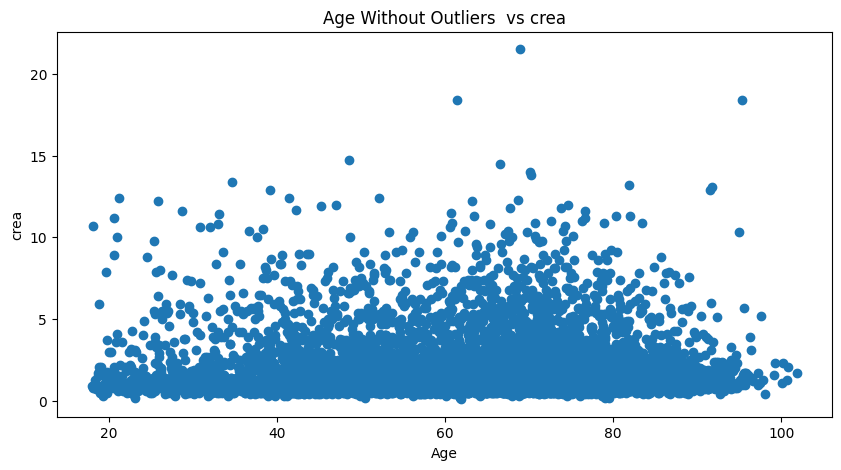

In [ ]:
# Plot the graph without outliers
plt.figure(figsize=(10, 5))
plt.scatter(new_crea['age'], new_crea['crea'])
plt.title('Age Without Outliers  vs crea')
plt.xlabel('Age')
plt.ylabel('crea')
plt.show()

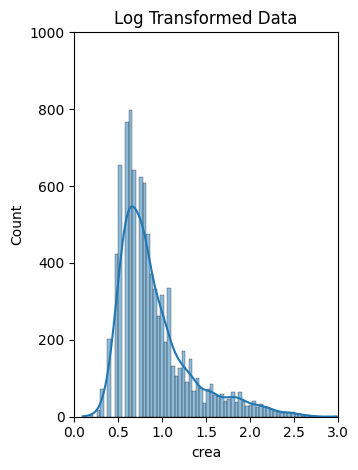

In [ ]:
# X['crea'].skew()
new_crea = df.copy()
new_crea['Log_crea'] = np.log1p(new_crea['crea'])
new_crea['Log_crea']=np.sqrt(new_crea['crea'])
new_crea['Log_crea']=np.cbrt(new_crea['crea'])

# X['Log_crea']=1/X['crea']

# X['Log_crea'], lambda_best = boxcox(X['crea'])

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(new_crea['crea']), kde=True)
plt.title('Log Transformed Data')
plt.xlim(0, 3)  # Set x-axis limits
plt.ylim(0,1000)  # Set y-axis limits
plt.tight_layout()
plt.show()

In [ ]:
def outliersnumeric(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    #outliers=col[(col<lower_bound)|(col>upper_bound)]
    #return outliers
    return lower_bound,upper_bound

In [ ]:
 outliersnumeric(df['crea'])

(-0.6000976599999998, 3.3999023399999997)

In [ ]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f'{col}: {df[col].dtype}')

    else:
        print(f'{col}: {df[col].dtype}')

age: float64
sex: object
dzgroup: object
dzclass: object
num.co: int64
edu: float64
income: object
scoma: float64
charges: float64
totcst: float64
totmcst: float64
avtisst: float64
race: object
sps: float64
aps: float64
surv2m: float64
surv6m: float64
hday: int64
diabetes: int64
dementia: int64
ca: object
prg2m: float64
prg6m: float64
dnr: object
dnrday: float64
meanbp: float64
wblc: float64
hrt: float64
resp: float64
temp: float64
pafi: float64
alb: float64
bili: float64
crea: float64
sod: float64
ph: float64
glucose: float64
bun: float64
urine: float64
adlp: float64
adls: float64
adlsc: float64
death: int64
hospdead: int64
sfdm2: object


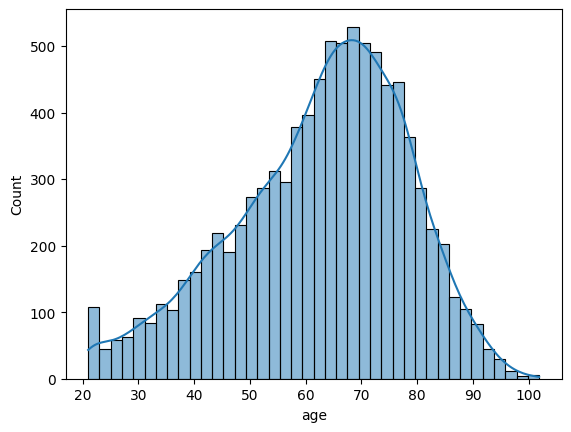

<Figure size 1500x4500 with 0 Axes>

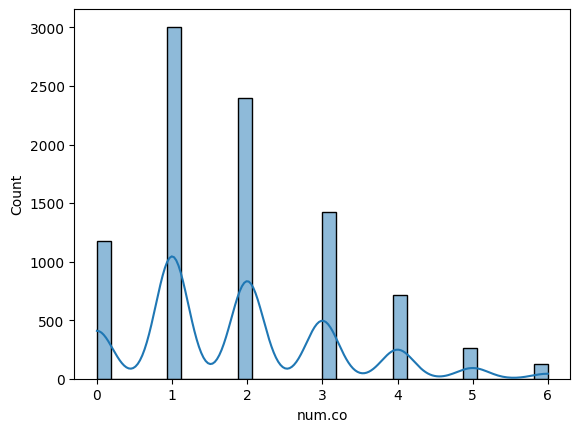

<Figure size 1500x4500 with 0 Axes>

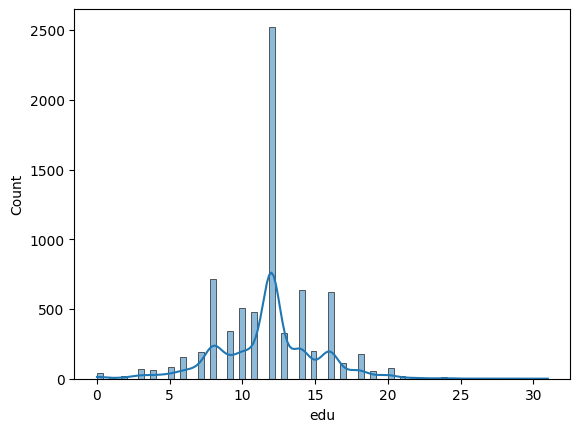

<Figure size 1500x4500 with 0 Axes>

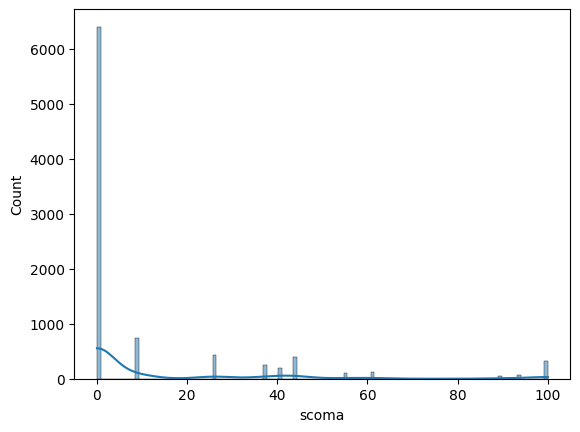

<Figure size 1500x4500 with 0 Axes>

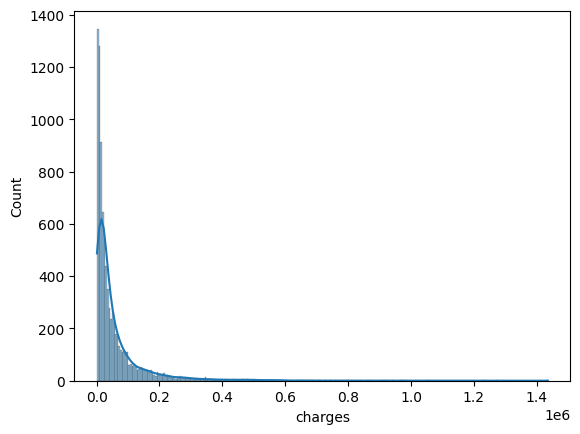

<Figure size 1500x4500 with 0 Axes>

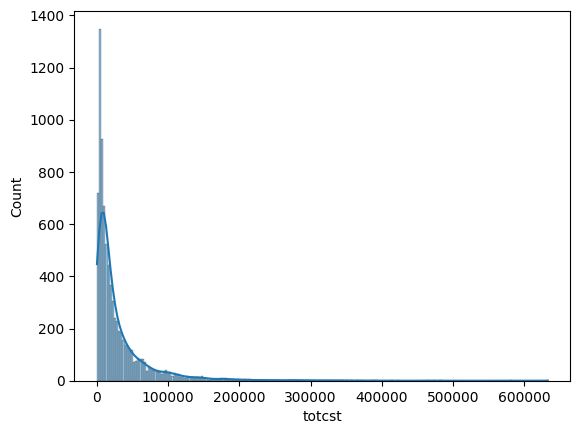

<Figure size 1500x4500 with 0 Axes>

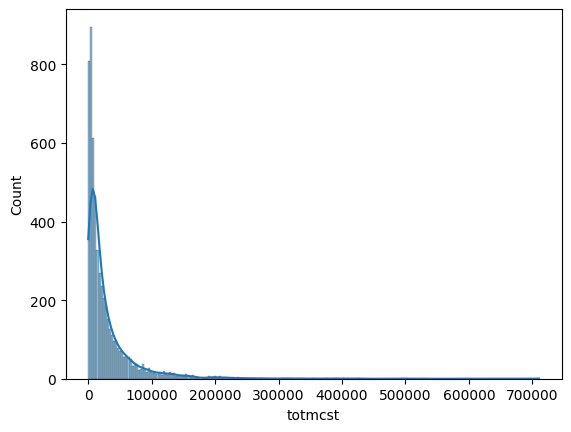

<Figure size 1500x4500 with 0 Axes>

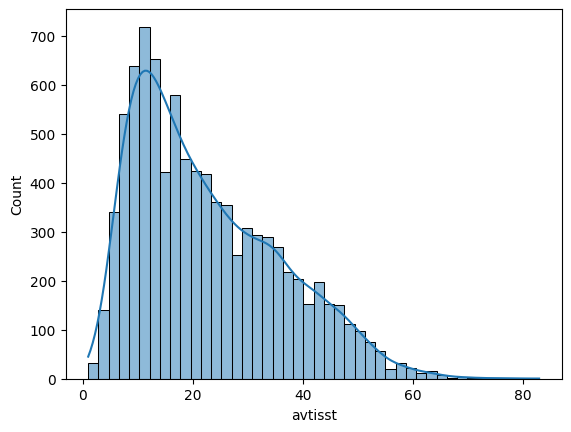

<Figure size 1500x4500 with 0 Axes>

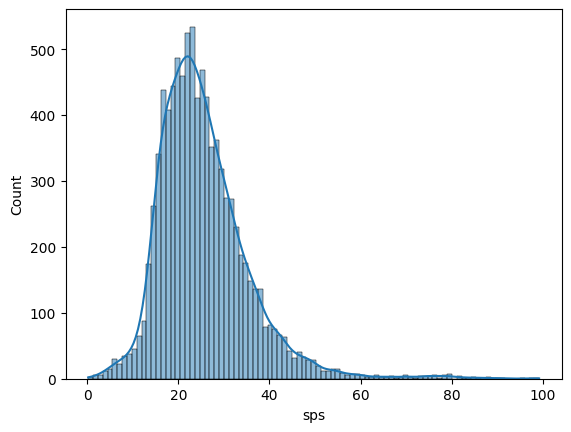

<Figure size 1500x4500 with 0 Axes>

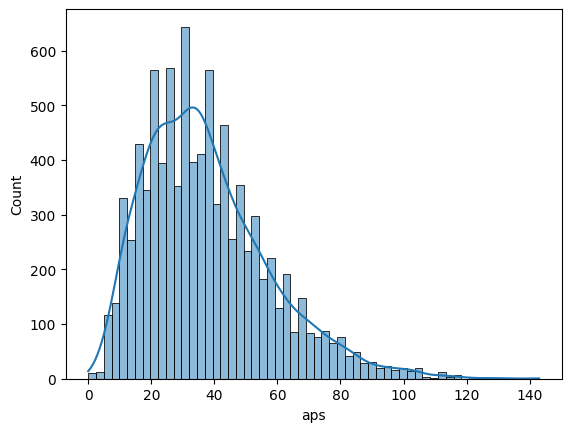

<Figure size 1500x4500 with 0 Axes>

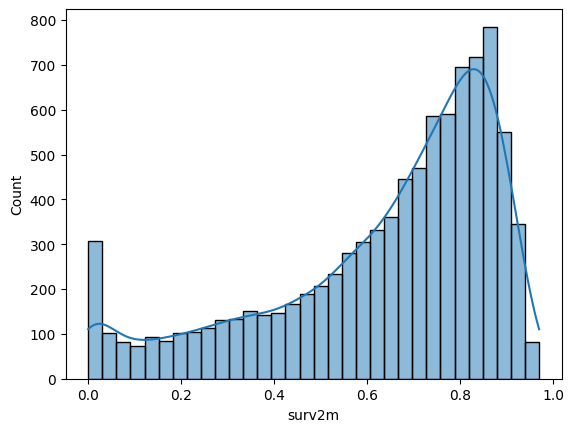

<Figure size 1500x4500 with 0 Axes>

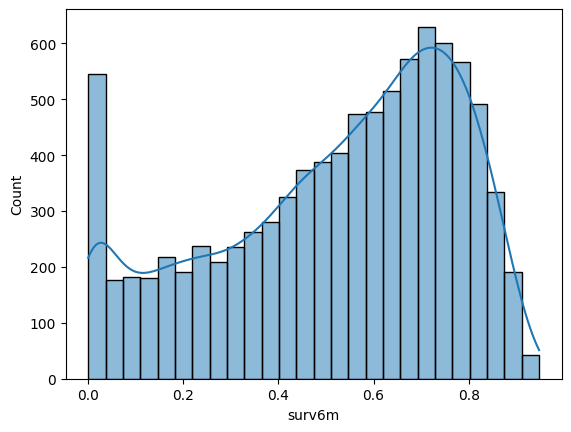

<Figure size 1500x4500 with 0 Axes>

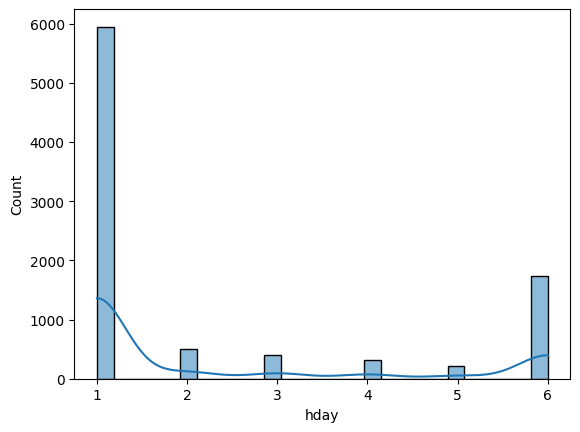

<Figure size 1500x4500 with 0 Axes>

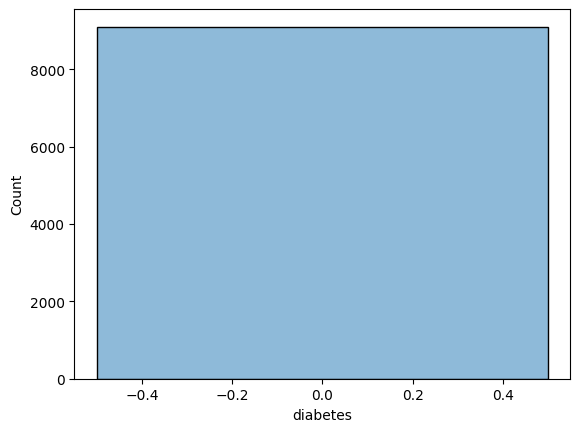

<Figure size 1500x4500 with 0 Axes>

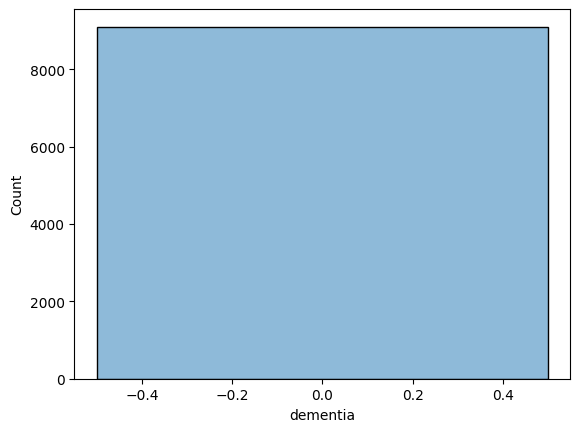

<Figure size 1500x4500 with 0 Axes>

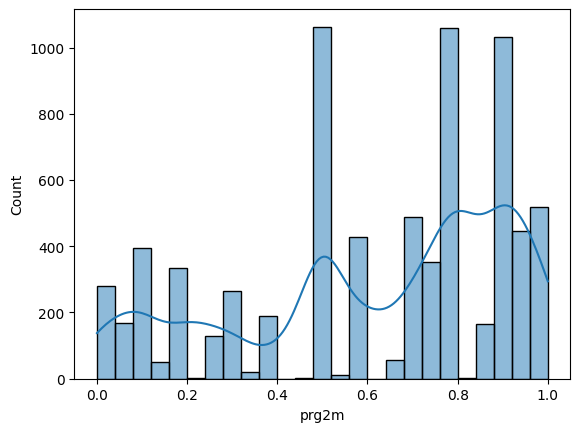

<Figure size 1500x4500 with 0 Axes>

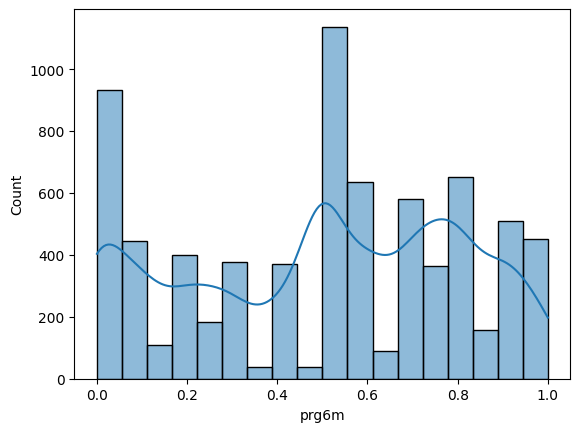

<Figure size 1500x4500 with 0 Axes>

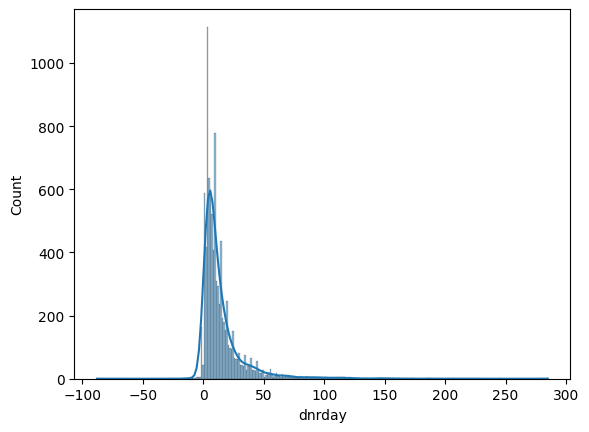

<Figure size 1500x4500 with 0 Axes>

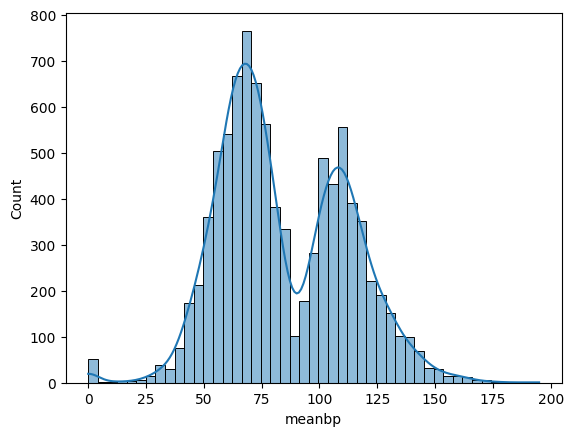

<Figure size 1500x4500 with 0 Axes>

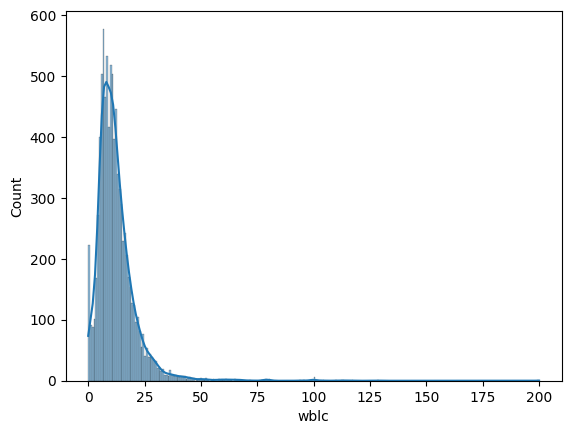

<Figure size 1500x4500 with 0 Axes>

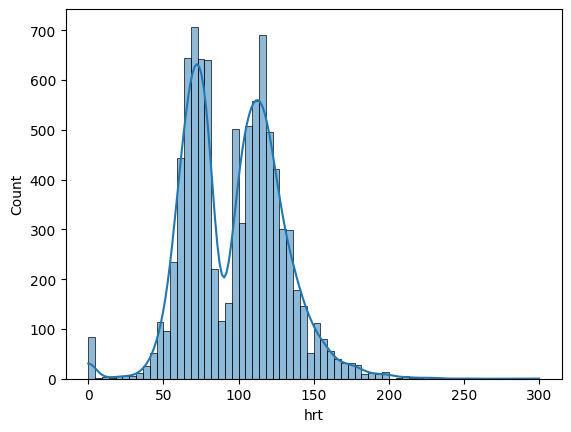

<Figure size 1500x4500 with 0 Axes>

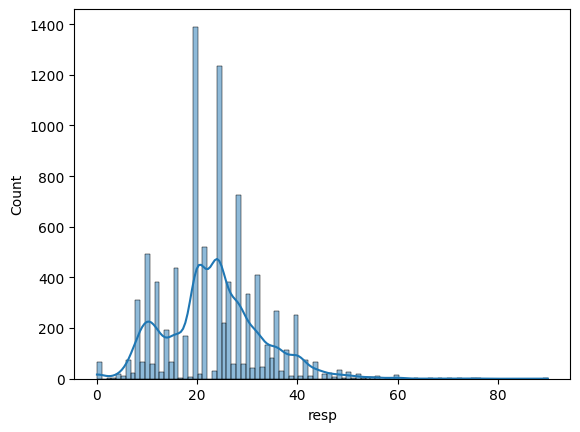

<Figure size 1500x4500 with 0 Axes>

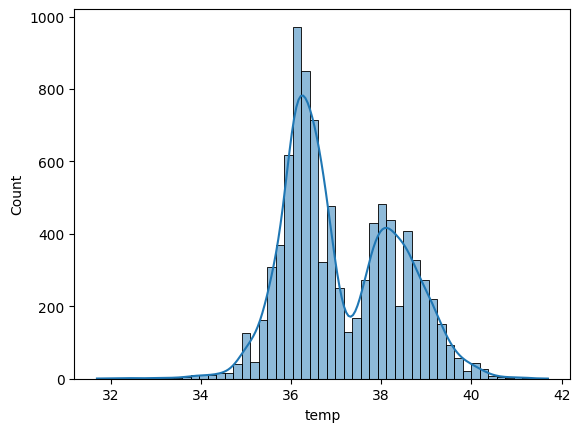

<Figure size 1500x4500 with 0 Axes>

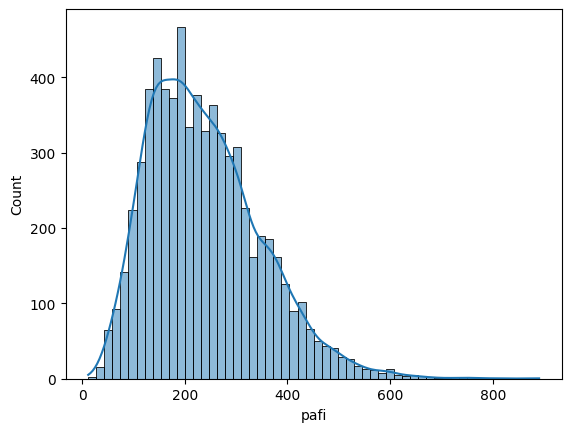

<Figure size 1500x4500 with 0 Axes>

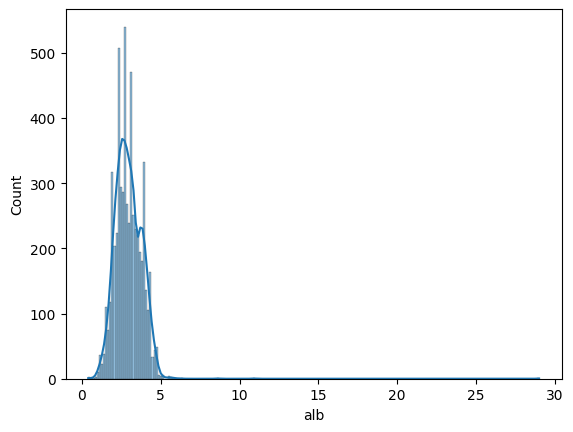

<Figure size 1500x4500 with 0 Axes>

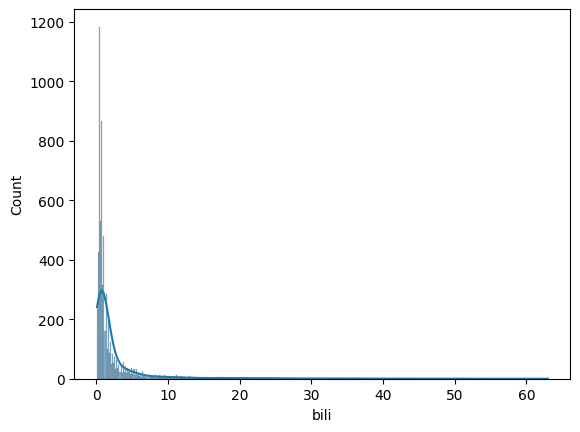

<Figure size 1500x4500 with 0 Axes>

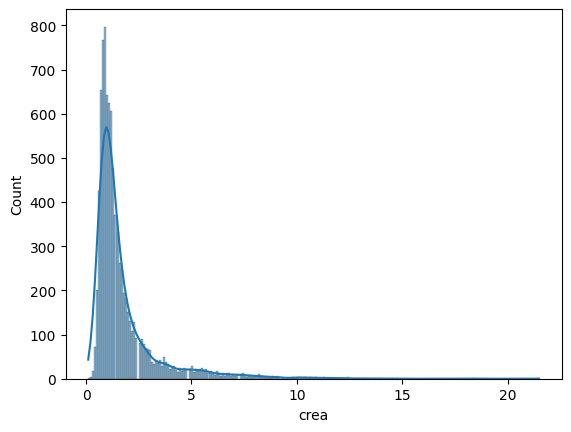

<Figure size 1500x4500 with 0 Axes>

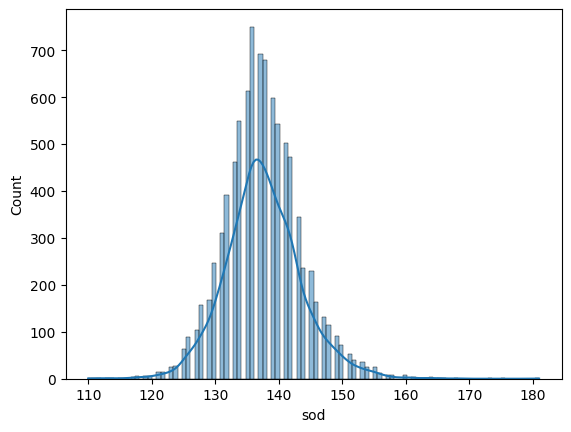

<Figure size 1500x4500 with 0 Axes>

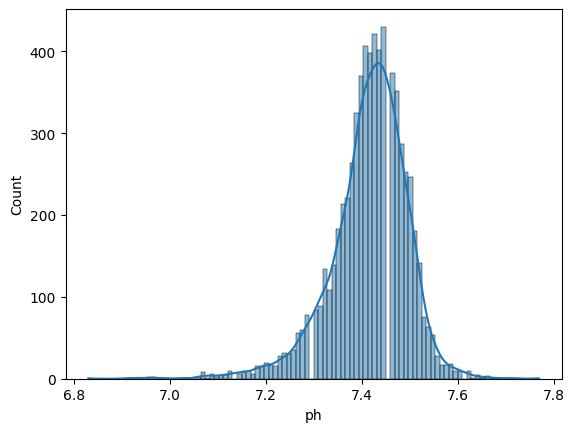

<Figure size 1500x4500 with 0 Axes>

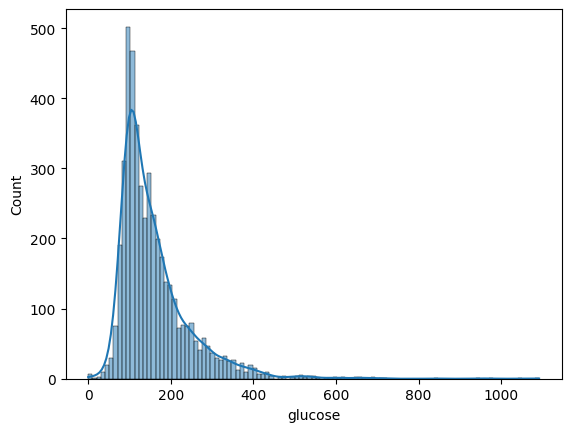

<Figure size 1500x4500 with 0 Axes>

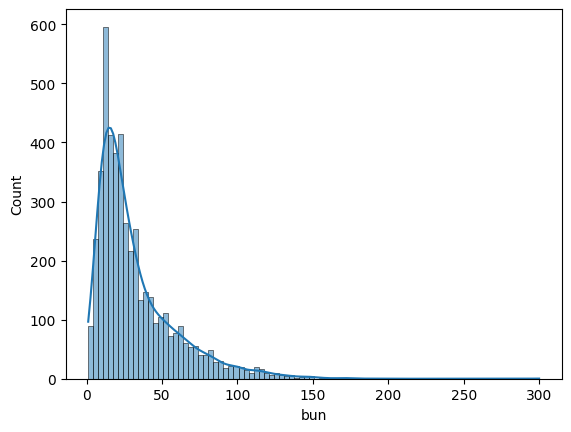

<Figure size 1500x4500 with 0 Axes>

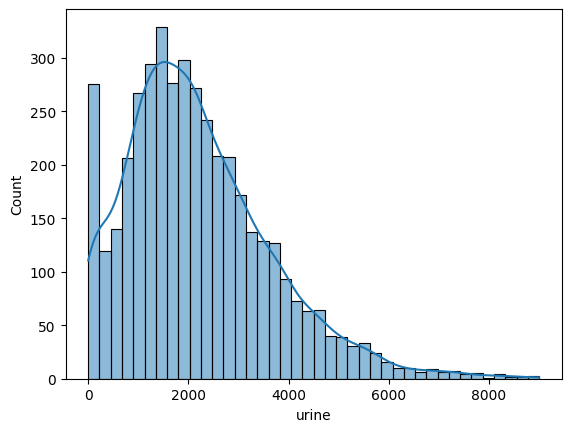

<Figure size 1500x4500 with 0 Axes>

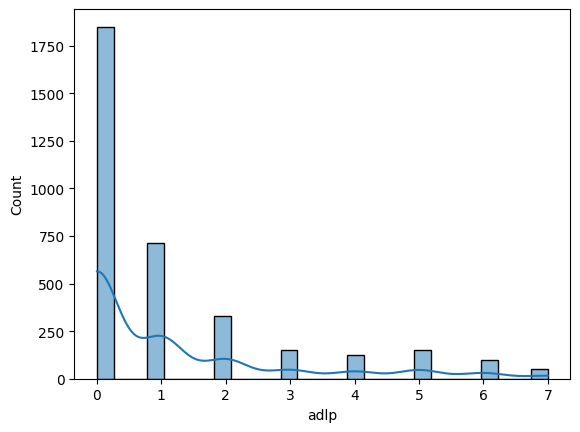

<Figure size 1500x4500 with 0 Axes>

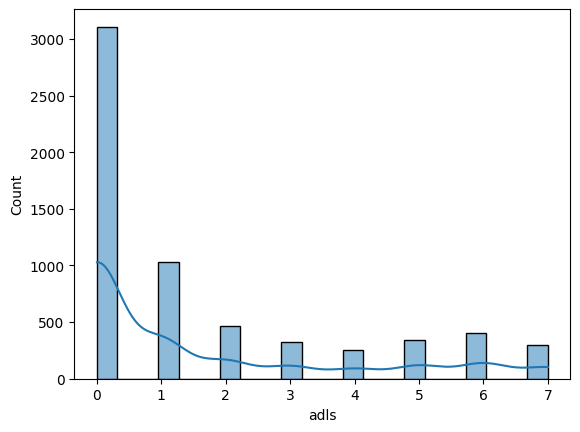

<Figure size 1500x4500 with 0 Axes>

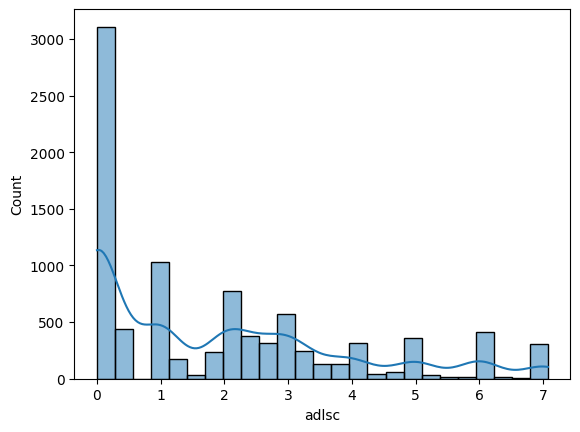

<Figure size 1500x4500 with 0 Axes>

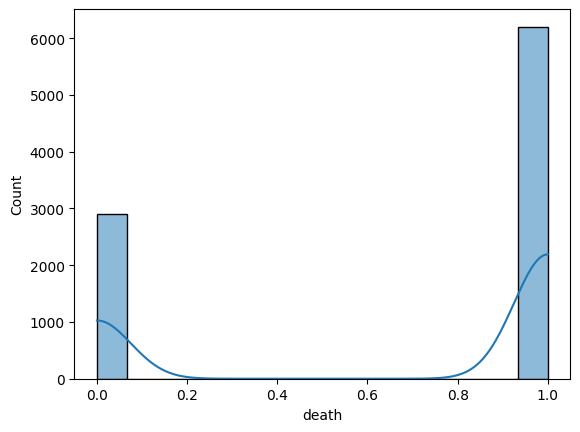

<Figure size 1500x4500 with 0 Axes>

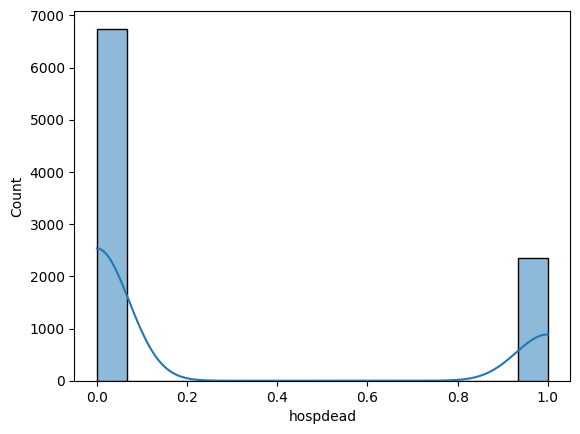

<Figure size 1500x4500 with 0 Axes>

In [ ]:
# for i in ['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'edu', 'scoma', 'charges',
#        'totcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
#        'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
#        'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'bili', 'crea', 'sod',
#        'ph', 'adlsc', 'death', 'hospdead', 'sfdm2']:
for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]):

    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(df[col]):
        outliersnumeric(df[col])
        lower_bound,upper_bound=outliersnumeric(df[col])
        df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])
        df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
    # sns.histplot(df[i])

        # print(df[i])


    sns.histplot(data=df, x=df[col], kde=True)
    num_columns = len(df.columns.tolist())

    columns_per_row = 3
    # Calculate the number of rows needed
    num_rows = math.ceil(num_columns / columns_per_row)

    # Create the figure with an appropriate size
    plt.figure(figsize=(columns_per_row * 5, num_rows * 3))
    plt.show()


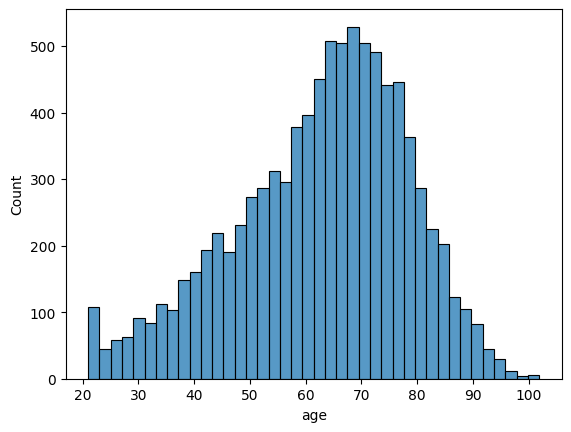

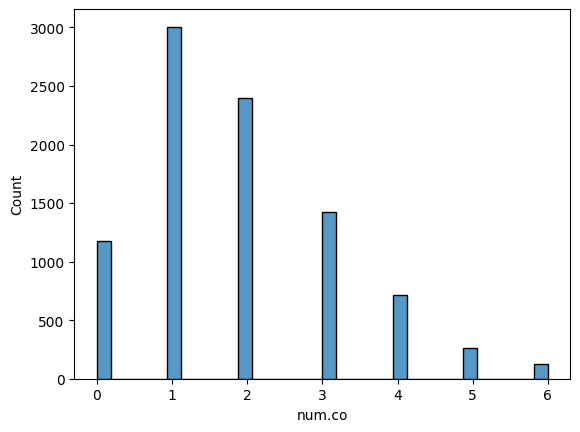

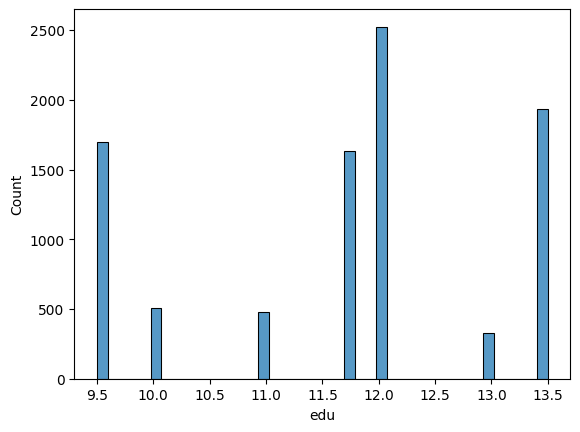

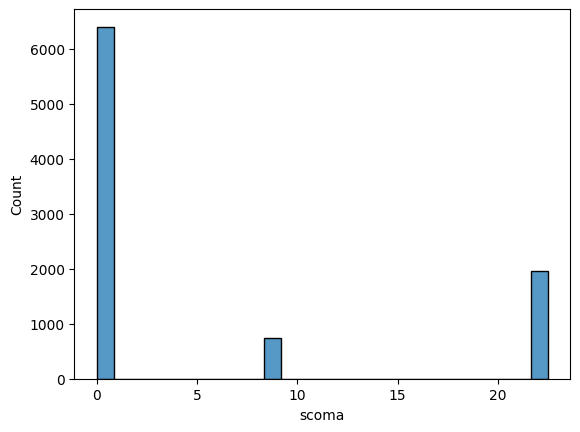

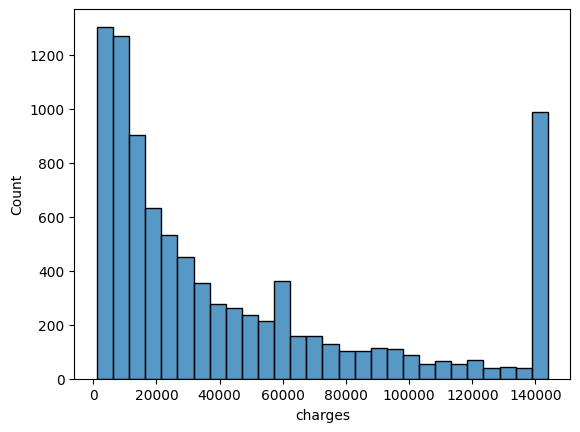

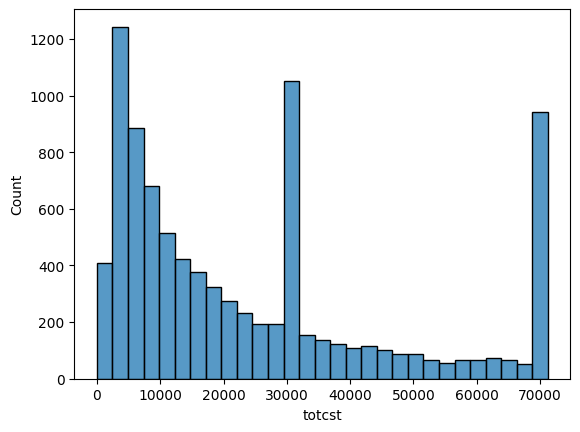

KeyError: 'totmcst'

In [ ]:
for i in ['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'edu', 'scoma', 'charges',
       'totcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'bili', 'crea', 'sod',
       'ph', 'adlsc', 'death', 'hospdead', 'sfdm2']:
    sns.histplot(df[i])
    plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'edu', 'scoma', 'charges',
       'totcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'bili', 'crea', 'sod',
       'ph', 'adlsc', 'death', 'hospdead', 'sfdm2'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
A = X.crea.values.reshape(-1,1)
B = X.age.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(A,B,test_size = 0.2,random_state = 0)

#Correlation Marix

In [ ]:
def corrmatrix(df):
    numerical_df = df.select_dtypes(exclude=['object'])
    corr_matrix = numerical_df.corr()
    plt.figure(figsize=(17, 15))  # Set the figure size (optional)
  #  Plotting the correlation matrix with smaller font size for annotations
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
    plt.title('Correlation Matrix')
    plt.show()

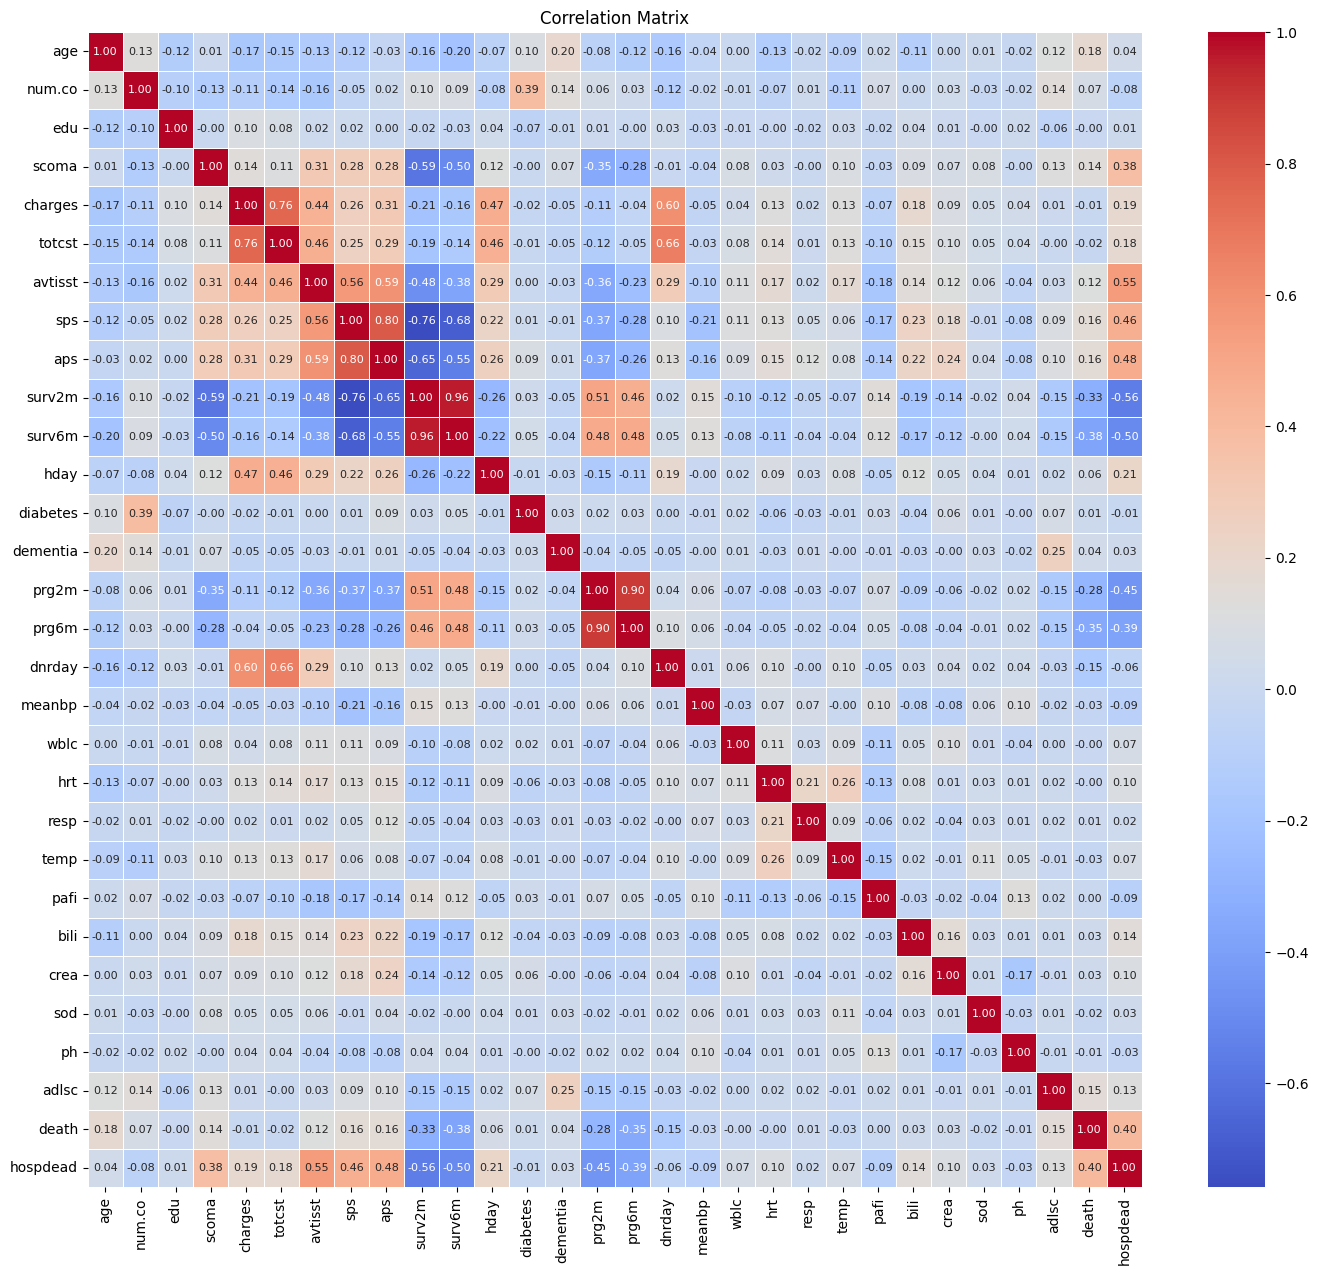

In [ ]:
corrmatrix(df)

## ANOVA

In [ ]:
df.nunique()

,0
age,7323
sex,2
dzgroup,8
dzclass,4
num.co,10
edu,32
scoma,12
charges,8502
totcst,8198
avtisst,353


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.datasets import make_regression

KeyError: 'income'

In [ ]:
# def anovacompute(df):
#   selector = SelectKBest(score_func=f_regression, k=4)
# #   for label in df.columns[1:]:
# #     if df[label].dtype == 'object':
# #         t_statistic, p_value = f_oneaway(group1, group2)

# # # Print the results
# # print("T-statistic:", t_statistic)
# # print("P-value:", p_value)
def perform_anova(df, categorical_cols, target):
  """
  Performs ANOVA for multiple categorical columns.

  Args:
    df: DataFrame containing the data.
    categorical_cols: List of categorical column names.
    target_variable: Name of the continuous target variable.

  Returns:
    A dictionary containing F-statistic and p-value for each categorical column.
  """

  results = {}
  for col in categorical_cols:
    groups = df[col].unique()
    if len(groups) > 2:  # Perform ANOVA only if more than 2 groups
      group_data = [df[df[col] == g][target] for g in groups]
      f_statistic, p_value = f_oneway(*group_data)
      results[col] = {'F-statistic': f_statistic, 'P-value': p_value}
  return results

In [ ]:
categorical_cols = ['death','hospdead','sex', 'dzgroup', 'dzclass', 'race', 'ca', 'sfdm2']
target='crea'
print(perform_anova(df, categorical_cols, target))

##Data Delete

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics